# Введение в искусственные нейронные сети
# Урок 3. TensorFlow

## Содержание методического пособия:


<ol>
<li>Что такое TensorFlow</li>
<li>Основы синтаксиса TensorFlow</li>
<li>Пример нейросети на TensorFlow</li>
</ol>

## Что такое TensorFlow

TensorFlow - это фреймворк для создания ML моделей. TensorFlow предназначен в первую очередь для Deep Learning, т.е. создания современных нейросетей. Однако в TensorFlow также есть поддержка некоторых классических ML алгоритмов: K-means clustering, Random Forests, Support Vector Machines, Gaussian Mixture Model clustering, Linear/logistic regression.

TensorFlow выпустила компания Google в 2015. TensorFlow - это opensource проект. На данный момент это один из основных инструментов для создания нейросетей в рабочих целях. TensorFlow позволяет создавать нейронные сети как для кластеров из большого количества вычислительных устройств, так и для устройств с относительно небольшой вычислитей мощностью, таких как смартфоны и одноплатные компьютеры.

TensorFlow применяется самой компанией Google для ее поиска, почты, переводчика, распознования голоса, внутренних нужд наподобие мониторинга оборудования. TensorFlow используется различными компаниями для различных проектов связанных с компьютерным зрением, решением задач ранжирования и т.д.


## Основы синтаксиса TensorFlow

Процесс создания нейросети на TensorFlow схож с разобранным нами процессом обучения нейросети на Keras. Отличее здесь в том, что здесь нам нужно прописать больше деталей в коде. 

Название TensorFlow означает поток тензоров. Тензоры - это массивы. Данные в компьютере предствлены часто в виде массивах и работа с этими массивами подразумевает их преобразования. Преобразования осуществляются через, к примеру, математические операции. Работа TensorFlow складывается из цепочки преобразований тензоров, т.е. данных. Сами операции осуществляющие преобразование данных представлены в TensorFlow в виде графов. Особенностью TensorFlow версии 1 является то, что сначала необходимо декларировать переменные и вычисления, которые будут совершенны над ними, а потом уже непосредственно запускать работу над данными. 

Давайте рассмотрим базовые вещи в синтаксисе Tensorflow 2.

Выведем строку Hello world, а также версию tensorflow

In [238]:
#!pip install --upgrade pip
#!pip install tensorflow
#!pip install tf-nightly

In [239]:
%tensorflow_version 2.x

In [240]:
import tensorflow as tf
print(tf.__version__)
msg = tf.constant('TensorFlow 2.0 Hello World')
tf.print(msg)

2.5.0
TensorFlow 2.0 Hello World


Пример создания тензора - 

In [241]:
A = tf.constant( [[3, 2], 
                 [5, 2]])

print(A)

tf.Tensor(
[[3 2]
 [5 2]], shape=(2, 2), dtype=int32)


In [242]:
w = tf.Variable([[1.], [2.]])
w

<tf.Variable 'Variable:0' shape=(2, 1) dtype=float32, numpy=
array([[1.],
       [2.]], dtype=float32)>

Тензор, заполненный только единицами

In [243]:
x = tf.ones(shape=(1, 2))
print(x)

tf.Tensor([[1. 1.]], shape=(1, 2), dtype=float32)


Тензор, заполненный только нулями:

In [244]:
x = tf.zeros(shape=(2, 1))
print(x)

tf.Tensor(
[[0.]
 [0.]], shape=(2, 1), dtype=float32)


Cлучайные тензоры

In [245]:
x = tf.random.normal(shape=(3, 1), mean=0., stddev=1.)
print(x)

tf.Tensor(
[[ 0.7775252 ]
 [-1.4288552 ]
 [-0.45894113]], shape=(3, 1), dtype=float32)


In [246]:
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
print(v)

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[-0.0732038 ],
       [-1.0809464 ],
       [ 0.10592472]], dtype=float32)>


Состояние переменной можно изменить с помощью метода assign

In [247]:
v.assign(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[1.],
       [1.],
       [1.]], dtype=float32)>

In [248]:
v[0, 0].assign(3.)

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[3.],
       [1.],
       [1.]], dtype=float32)>

Пример изменения размерности тензора - 

In [249]:
tensor = tf.constant([[3, 2], 
                      [5, 2], 
                      [9, 5], 
                      [1, 3]])

resh_tensor = tf.reshape(tensor = tensor, shape = [1, 8]) 

print(f'BEFORE {tensor.numpy()}')
print(f'AFTER {resh_tensor.numpy()}')

BEFORE [[3 2]
 [5 2]
 [9 5]
 [1 3]]
AFTER [[3 2 5 2 9 5 1 3]]


Пример сложения тензеров - 

In [250]:
B = tf.constant([[9, 5], 
                 [1, 3]])

AB = tf.concat(values=[A, B], axis=1)
print(AB.numpy())

[[3 2 9 5]
 [5 2 1 3]]


Для переменных можно еще и так (добавить к тому. что есть)

In [251]:
v.assign_add(tf.ones((3, 1)))

<tf.Variable 'UnreadVariable' shape=(3, 1) dtype=float32, numpy=
array([[4.],
       [2.],
       [2.]], dtype=float32)>

Пример умножения матриц, одной из самых частых операций в машинном обучении - 

In [252]:
A = tf.constant([[3, 7], 
                 [1, 9]])


B = tf.constant([[10, 10],
                 [1000, 1000]])

AB = tf.multiply(A, B)
print(AB)


tf.Tensor(
[[  30   70]
 [1000 9000]], shape=(2, 2), dtype=int32)


In [253]:
x = tf.matmul([[5]], [[2, 3]])
print(x)
print(x.shape)
print(x.dtype)

tf.Tensor([[10 15]], shape=(1, 2), dtype=int32)
(1, 2)
<dtype: 'int32'>


Можно много всякого похожего на numpy

In [254]:
a = tf.ones((2, 2)) * 2
print(a)
b = tf.square(a)
print(b)
c = tf.sqrt(a)
print(c)
d = b + c
print(d)
e = tf.matmul(a, b)
print(e)
e *= d
print(e)



tf.Tensor(
[[2. 2.]
 [2. 2.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[4. 4.]
 [4. 4.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[1.4142135 1.4142135]
 [1.4142135 1.4142135]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[5.4142137 5.4142137]
 [5.4142137 5.4142137]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[16. 16.]
 [16. 16.]], shape=(2, 2), dtype=float32)
tf.Tensor(
[[86.62742 86.62742]
 [86.62742 86.62742]], shape=(2, 2), dtype=float32)


In [255]:
import numpy as np

ndarray = np.ones([3, 3])

print("превратим numpy arrays в Tensors ")
tensor = tf.multiply(ndarray, 42)
print(tensor)


print("добавим к тензору 1 ")
print(np.add(tensor, 1))

print(" .numpy() превратим тензор в  numpy array")
print(tensor.numpy())

превратим numpy arrays в Tensors 
tf.Tensor(
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]], shape=(3, 3), dtype=float64)
добавим к тензору 1 
[[43. 43. 43.]
 [43. 43. 43.]
 [43. 43. 43.]]
 .numpy() превратим тензор в  numpy array
[[42. 42. 42.]
 [42. 42. 42.]
 [42. 42. 42.]]


Проверяем работу GPU

https://www.tensorflow.org/guide/gpu

In [256]:
x = tf.random.uniform([3, 3])

print("есть ли доступные GPU: "),
print(tf.config.experimental.list_physical_devices("GPU"))

print("тензор на GPU #0:  "),
print(x.device.endswith('GPU:0'))


есть ли доступные GPU: 
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
тензор на GPU #0:  
True


Сделаем по 10 циклов на GPU и CPU:

In [257]:
import time

def time_matmul(x):
  start = time.time()
  for loop in range(10):
    tf.matmul(x, x)

  result = time.time()-start

  print("10 циклов: {:0.2f}ms".format(1000*result))

# исполнение CPU
print(" CPU работает:")
with tf.device("CPU:0"):
  x = tf.random.uniform([1000, 1000])
  assert x.device.endswith("CPU:0")
  time_matmul(x)

# исполнение на GPU #0 , если доступен
if tf.config.experimental.list_physical_devices("GPU"):
  print(" какой GPU:")
  with tf.device("GPU:0"): # или GPU:1 , для 2х GPU, GPU:2 для 3х  и т.д.
    x = tf.random.uniform([1000, 1000])
    assert x.device.endswith("GPU:0")
    time_matmul(x)

 CPU работает:
10 циклов: 314.66ms
 какой GPU:
10 циклов: 1.05ms


ГЛАВНЫЙ ФОКУС!!!
Вычисляем производные (для дифференцируемых функций)

In [258]:
input_var = tf.Variable(initial_value=3.)
with tf.GradientTape() as tape:
   result = tf.square(input_var)
gradient = tape.gradient(result, input_var)

print('input_var : ',input_var)
print('result = input_var^2 : ',result)
print('gradient : ',gradient)


input_var :  <tf.Variable 'Variable:0' shape=() dtype=float32, numpy=3.0>
result = input_var^2 :  tf.Tensor(9.0, shape=(), dtype=float32)
gradient :  tf.Tensor(6.0, shape=(), dtype=float32)


Производная второго порядка:

In [259]:
import numpy as np
import matplotlib.pyplot as plt

input_t = tf.Variable(np.arange(10), dtype='float32')
with tf.GradientTape() as outer_tape:
  with tf.GradientTape() as inner_tape:
    x =  4.9 * input_t ** 2  # g * t^2 /2
  speed = inner_tape.gradient(x, input_t)  # g * t
acceleration = outer_tape.gradient(speed, input_t)   # g 


print('x : ',x)
print('t : ',input_t)
print('v : ',speed)
print('a : ',acceleration)

x :  tf.Tensor(
[  0.         4.9       19.6       44.100002  78.4      122.49999
 176.40001  240.09999  313.6      396.9     ], shape=(10,), dtype=float32)
t :  <tf.Variable 'Variable:0' shape=(10,) dtype=float32, numpy=array([0., 1., 2., 3., 4., 5., 6., 7., 8., 9.], dtype=float32)>
v :  tf.Tensor(
[ 0.        9.8      19.6      29.400002 39.2      49.       58.800003
 68.600006 78.4      88.200005], shape=(10,), dtype=float32)
a :  tf.Tensor([9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8 9.8], shape=(10,), dtype=float32)


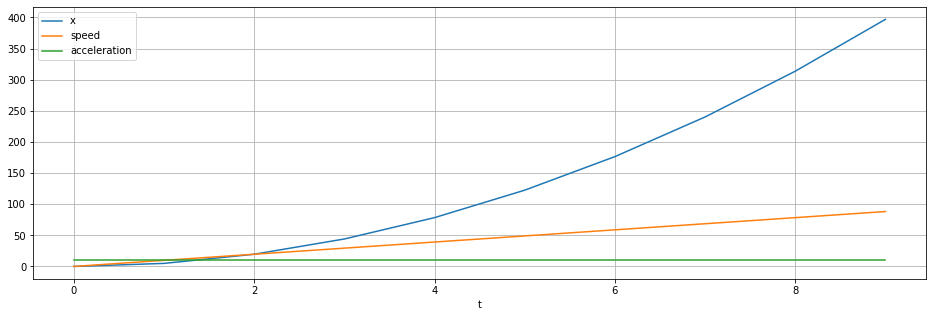

In [260]:
plt.figure(figsize=(16,5))
plt.plot(input_t.numpy(), x.numpy(), label = 'x')
plt.plot(input_t.numpy(), speed.numpy(), label = 'speed')
plt.plot(input_t.numpy(), acceleration.numpy(), label = 'acceleration')
plt.legend()
plt.xlabel('t')
plt.grid('on')
plt.show()

В отличие от графического процессора, использование TPU требует явного подключения к работнику TPU. Поэтому необходимо настроить свое обучение и определение логического вывода, чтобы наблюдать ускорение

пример работы с TPU на будущее

https://www.tensorflow.org/guide/tpu

https://colab.research.google.com/github/tensorflow/tpu/blob/master/tools/colab/shakespeare_with_tpu_and_keras.ipynb

Функции tensorflow призваны ускорить вычисления, давайте посмотрим на следующий пример - 

In [261]:
from tensorflow.keras.datasets import mnist


(train_images,train_labels),(test_images,testn_labels)=mnist.load_data()

# Нормализация.
train_images = (train_images / 255) * 2 - 1
test_images = (test_images / 255) * 2 - 1

# векторизация.
train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)



(60000, 784)
(10000, 784)


In [262]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical

In [263]:
import matplotlib.pyplot as plt


In [264]:
bigger_model = Sequential([
    Dense( 512, activation='relu', input_shape=(784,)),
    Dense(512, activation='linear'),
    Dense(10, activation='softmax')
])

bigger_model.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

bigger_model.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_90 (Dense)             (None, 512)               401920    
_________________________________________________________________
dense_91 (Dense)             (None, 512)               262656    
_________________________________________________________________
dense_92 (Dense)             (None, 10)                5130      
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [265]:
bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
                                  epochs=5,
                                  batch_size=2000, validation_split=0.2)

Epoch 1/5
24/24 [==============================] - 1s 21ms/step - loss: 1.2314 - accuracy: 0.6574 - val_loss: 0.4055 - val_accuracy: 0.8821
Epoch 2/5
24/24 [==============================] - 0s 14ms/step - loss: 0.3603 - accuracy: 0.8925 - val_loss: 0.2792 - val_accuracy: 0.9187
Epoch 3/5
24/24 [==============================] - 0s 13ms/step - loss: 0.2633 - accuracy: 0.9228 - val_loss: 0.2180 - val_accuracy: 0.9355
Epoch 4/5
24/24 [==============================] - 0s 14ms/step - loss: 0.2045 - accuracy: 0.9416 - val_loss: 0.1786 - val_accuracy: 0.9485
Epoch 5/5
24/24 [==============================] - 0s 12ms/step - loss: 0.1653 - accuracy: 0.9515 - val_loss: 0.1518 - val_accuracy: 0.9563


Работа на GPU и СPU



Строго GPU:

In [266]:
print("On GPU:")
with tf.device("GPU:0"):
  
  bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
  epochs=5,
  batch_size=2000, validation_split=0.2)

On GPU:
Epoch 1/5
24/24 [==============================] - 0s 14ms/step - loss: 0.1392 - accuracy: 0.9608 - val_loss: 0.1374 - val_accuracy: 0.9614
Epoch 2/5
24/24 [==============================] - 0s 13ms/step - loss: 0.1190 - accuracy: 0.9652 - val_loss: 0.1213 - val_accuracy: 0.9641
Epoch 3/5
24/24 [==============================] - 0s 14ms/step - loss: 0.1015 - accuracy: 0.9715 - val_loss: 0.1150 - val_accuracy: 0.9653
Epoch 4/5
24/24 [==============================] - 0s 13ms/step - loss: 0.0880 - accuracy: 0.9751 - val_loss: 0.1091 - val_accuracy: 0.9671
Epoch 5/5
24/24 [==============================] - 0s 12ms/step - loss: 0.0784 - accuracy: 0.9770 - val_loss: 0.1001 - val_accuracy: 0.9687


Строго CPU:

In [267]:
print("On CPU:")
with tf.device("CPU:0"):
  
  bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
  epochs=5,
  batch_size=2000, validation_split=0.2)


On CPU:
Epoch 1/5
24/24 [==============================] - 3s 130ms/step - loss: 0.0692 - accuracy: 0.9804 - val_loss: 0.1010 - val_accuracy: 0.9689
Epoch 2/5
24/24 [==============================] - 3s 128ms/step - loss: 0.0615 - accuracy: 0.9826 - val_loss: 0.0949 - val_accuracy: 0.9707
Epoch 3/5
24/24 [==============================] - 3s 126ms/step - loss: 0.0547 - accuracy: 0.9849 - val_loss: 0.0893 - val_accuracy: 0.9727
Epoch 4/5
24/24 [==============================] - 3s 126ms/step - loss: 0.0475 - accuracy: 0.9871 - val_loss: 0.0901 - val_accuracy: 0.9720
Epoch 5/5
24/24 [==============================] - 3s 127ms/step - loss: 0.0424 - accuracy: 0.9887 - val_loss: 0.0889 - val_accuracy: 0.9725


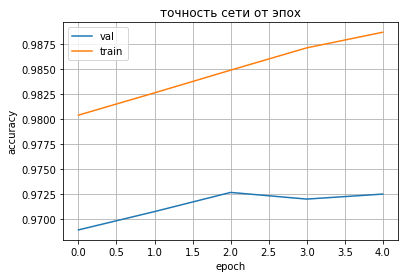

In [268]:
plt.plot(bigger_history.history['val_accuracy'] ,label='val')
plt.plot(bigger_history.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

Выбрать из возможностей CPU/GPU

In [269]:
# исполнение на GPU #0 , если доступен
if tf.config.experimental.list_physical_devices("GPU"):
  print("  GPU:")
  with tf.device("GPU:0"): # или GPU:1 , для 2х GPU, GPU:2 для 3х  и т.д.
    
    bigger_model.fit( train_images, to_categorical(train_labels,10), epochs=1,batch_size=2000, validation_split=0.2)

  GPU:
24/24 [==============================] - 0s 16ms/step - loss: 0.0400 - accuracy: 0.9891 - val_loss: 0.0862 - val_accuracy: 0.9743


In [270]:
bigger_history = bigger_model.fit( train_images, to_categorical(train_labels,10),
                                  epochs=5,
                                  batch_size=2000, validation_split=0.2)

Epoch 1/5
24/24 [==============================] - 0s 15ms/step - loss: 0.0342 - accuracy: 0.9914 - val_loss: 0.0836 - val_accuracy: 0.9743
Epoch 2/5
24/24 [==============================] - 0s 14ms/step - loss: 0.0312 - accuracy: 0.9920 - val_loss: 0.0872 - val_accuracy: 0.9747
Epoch 3/5
24/24 [==============================] - 0s 13ms/step - loss: 0.0316 - accuracy: 0.9913 - val_loss: 0.0846 - val_accuracy: 0.9747
Epoch 4/5
24/24 [==============================] - 0s 13ms/step - loss: 0.0259 - accuracy: 0.9937 - val_loss: 0.0846 - val_accuracy: 0.9746
Epoch 5/5
24/24 [==============================] - 0s 14ms/step - loss: 0.0240 - accuracy: 0.9939 - val_loss: 0.0844 - val_accuracy: 0.9762


Построим еще моделей

In [271]:
bigger_model2 = Sequential([
    Dense(512, activation='relu', input_shape=(784,)),
    Dense(512, activation='linear'),
    Dense(10, activation='softmax')
])

bigger_model2.compile(optimizer='adam',
                     loss='categorical_crossentropy',
                     metrics=['accuracy'])

bigger_history2 = bigger_model2.fit( train_images, to_categorical(train_labels,10),
  epochs=5,
  batch_size=2000, validation_split=0.2
)

Epoch 1/5
24/24 [==============================] - 1s 19ms/step - loss: 1.1167 - accuracy: 0.6948 - val_loss: 0.4046 - val_accuracy: 0.8786
Epoch 2/5
24/24 [==============================] - 0s 13ms/step - loss: 0.3381 - accuracy: 0.8990 - val_loss: 0.2588 - val_accuracy: 0.9255
Epoch 3/5
24/24 [==============================] - 0s 14ms/step - loss: 0.2357 - accuracy: 0.9328 - val_loss: 0.1980 - val_accuracy: 0.9440
Epoch 4/5
24/24 [==============================] - 0s 13ms/step - loss: 0.1831 - accuracy: 0.9470 - val_loss: 0.1645 - val_accuracy: 0.9532
Epoch 5/5
24/24 [==============================] - 0s 15ms/step - loss: 0.1479 - accuracy: 0.9571 - val_loss: 0.1420 - val_accuracy: 0.9596


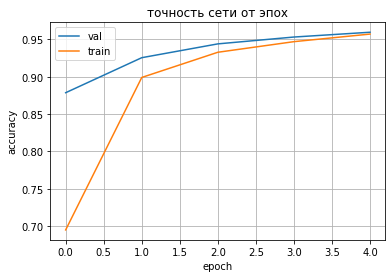

In [272]:
plt.plot(bigger_history2.history['val_accuracy'] ,label='val')
plt.plot(bigger_history2.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

И еще одну

In [273]:
bigger_history3 = bigger_model2.fit( train_images, to_categorical(train_labels,10),
  epochs=5,
  batch_size=2000, validation_split=0.2
)

Epoch 1/5
24/24 [==============================] - 0s 14ms/step - loss: 0.1238 - accuracy: 0.9641 - val_loss: 0.1296 - val_accuracy: 0.9622
Epoch 2/5
24/24 [==============================] - 0s 12ms/step - loss: 0.1086 - accuracy: 0.9686 - val_loss: 0.1195 - val_accuracy: 0.9647
Epoch 3/5
24/24 [==============================] - 0s 12ms/step - loss: 0.0919 - accuracy: 0.9737 - val_loss: 0.1163 - val_accuracy: 0.9651
Epoch 4/5
24/24 [==============================] - 0s 13ms/step - loss: 0.0803 - accuracy: 0.9770 - val_loss: 0.1039 - val_accuracy: 0.9690
Epoch 5/5
24/24 [==============================] - 0s 13ms/step - loss: 0.0727 - accuracy: 0.9788 - val_loss: 0.1065 - val_accuracy: 0.9673


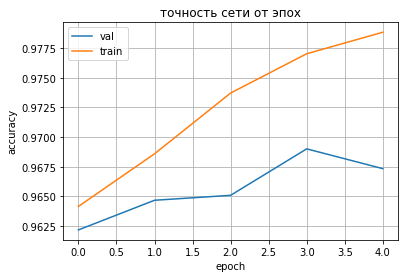

In [274]:
plt.plot(bigger_history3.history['val_accuracy'] ,label='val')
plt.plot(bigger_history3.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

In [275]:
bigger_history3 = bigger_model2.fit( train_images, to_categorical(train_labels,10),
  epochs=15,
  batch_size=2000, validation_split=0.2
)

Epoch 1/15
24/24 [==============================] - 0s 15ms/step - loss: 0.0649 - accuracy: 0.9814 - val_loss: 0.0945 - val_accuracy: 0.9737
Epoch 2/15
24/24 [==============================] - 0s 12ms/step - loss: 0.0567 - accuracy: 0.9836 - val_loss: 0.0906 - val_accuracy: 0.9738
Epoch 3/15
24/24 [==============================] - 0s 14ms/step - loss: 0.0508 - accuracy: 0.9856 - val_loss: 0.0909 - val_accuracy: 0.9736
Epoch 4/15
24/24 [==============================] - 0s 11ms/step - loss: 0.0453 - accuracy: 0.9873 - val_loss: 0.0865 - val_accuracy: 0.9754
Epoch 5/15
24/24 [==============================] - 0s 12ms/step - loss: 0.0393 - accuracy: 0.9894 - val_loss: 0.0869 - val_accuracy: 0.9751
Epoch 6/15
24/24 [==============================] - 0s 12ms/step - loss: 0.0366 - accuracy: 0.9901 - val_loss: 0.0899 - val_accuracy: 0.9732
Epoch 7/15
24/24 [==============================] - 0s 12ms/step - loss: 0.0329 - accuracy: 0.9913 - val_loss: 0.0929 - val_accuracy: 0.9716
Epoch 8/15
24

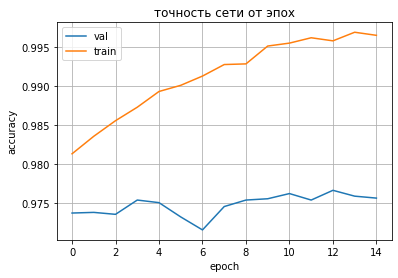

In [276]:
plt.plot(bigger_history3.history['val_accuracy'] ,label='val')
plt.plot(bigger_history3.history['accuracy'] ,label='train')
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

### Оптимизаторы

In [277]:
from tensorflow.keras.optimizers import Adam, SGD, RMSprop, Adagrad

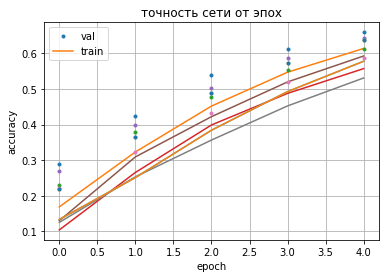

In [278]:
for i in [0,1,2,3,4]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(10, activation='sigmoid')
                              ])

  bigger_model4.compile(optimizer='sgd',
                        loss='categorical_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10),epochs=5,
                                        batch_size=20000, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.' )
  plt.plot(bigger_history4.history['accuracy'] )
plt.plot(bigger_history4.history['val_accuracy'],'.' ,label='val')
plt.plot(bigger_history4.history['accuracy'] ,label='train')
plt.grid()
plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.show()

Параметры оптимизаторов


Задача на один класс: to_categorical(train_labels,10)[:,0] 

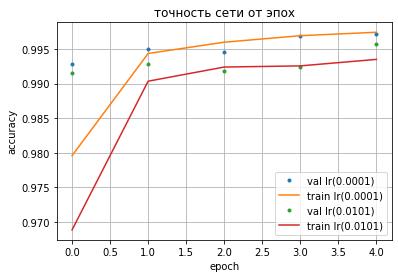

In [279]:
for i in [0,1]:
  bigger_model4 = Sequential([
                              Dense(512, activation='relu', input_shape=(784,)),
                              Dense(512, activation='linear'),
                              Dense(1, activation='sigmoid')  # нейронов на выходе 1 - для одного класса один выход ( бинарный классификатор)
                              ])

  bigger_model4.compile(optimizer= Adam(learning_rate=0.0001+0.01*i, beta_1=0.89) ,
                        loss='binary_crossentropy',
                        metrics=['accuracy'])

  bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10)[:,0],epochs=5,
                                        batch_size=200, validation_split=0.2, verbose = 0
                                      )
  plt.plot(bigger_history4.history['val_accuracy'],'.',label='val lr(' +str(0.0001+0.01*i)+')')
  plt.plot(bigger_history4.history['accuracy'] ,label='train lr(' +str(0.0001+0.01*i)+')')

plt.legend()
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('точность сети от эпох')
plt.grid()
plt.show()

In [280]:
bigger_history4 = bigger_model4.fit( train_images, to_categorical(train_labels,10)[:,0],epochs=5,
                                        batch_size=200, validation_split=0.2, verbose = 0
                                      )

# Классификация изображений одежды

Давайте разберем использование tensorflow 2 на примере датасета с одеждой. В это датасете будут находиться маленькие изображения на белом фоне, такие как кросовки, футболки и прочее.

В данном случае мы будем использовать High API от TensorFlow

In [281]:
from __future__ import absolute_import, division, print_function, unicode_literals

# TensorFlow and tf.keras

from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


## Импортируем Fashion MNIST датасет

Мы будет использовать следующий датасет -  [Fashion MNIST](https://github.com/zalandoresearch/fashion-mnist) Этот датасет содержит 70,000 черно-белых изображений в 10 категориях. Изображения имеют разрешение 28x28 пикселей.

<table>
  <tr><td>
    <img src="https://tensorflow.org/images/fashion-mnist-sprite.png"
         alt="Fashion MNIST sprite"  width="600">
  </td></tr>
  <tr><td align="center">
    <b>Figure 1.</b> <a href="https://github.com/zalandoresearch/fashion-mnist">Fashion-MNIST samples</a> (by Zalando, MIT License).<br/>&nbsp;
  </td></tr>
</table>

Долгое время в машинном обучение для программ Hello world использовался датасет MNIST с рукописными цифрами. Данный датасет призван несколько усложнить задачу распознования но также подходит в качестве программы Hello world.

В этом датасете 60 000 тренировочных изображений и 10 000 тестовых.

In [282]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

Датасет содержит следующие классы:

<table>
  <tr>
    <th>Label</th>
    <th>Class</th>
  </tr>
  <tr>
    <td>0</td>
    <td>T-shirt/top</td>
  </tr>
  <tr>
    <td>1</td>
    <td>Trouser</td>
  </tr>
    <tr>
    <td>2</td>
    <td>Pullover</td>
  </tr>
    <tr>
    <td>3</td>
    <td>Dress</td>
  </tr>
    <tr>
    <td>4</td>
    <td>Coat</td>
  </tr>
    <tr>
    <td>5</td>
    <td>Sandal</td>
  </tr>
    <tr>
    <td>6</td>
    <td>Shirt</td>
  </tr>
    <tr>
    <td>7</td>
    <td>Sneaker</td>
  </tr>
    <tr>
    <td>8</td>
    <td>Bag</td>
  </tr>
    <tr>
    <td>9</td>
    <td>Ankle boot</td>
  </tr>
</table>

Каждому классу обозначенному цифрой мы можем присвоить текстовое значение -

In [283]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## Анализ датасета 

Давайте посмотрим структуры полученного массива данных:

In [284]:
train_images.shape

(60000, 28, 28)

In [285]:
len(train_labels)

60000

In [286]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

Проанализируем тестовую выборку:

In [287]:
test_images.shape

(10000, 28, 28)

In [288]:
len(test_labels)

10000

In [289]:
y_train_labels = to_categorical(train_labels)
y_test_labels = to_categorical(test_labels)

## Preprocess the data

Давайте взглянем на конкретный пример изображений с помощью matplotlib:

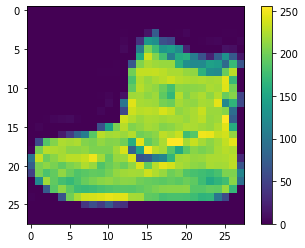

In [290]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Для процесса обучения нейронной сети нам важно перевести данные из диапазона от 0 до 255 в диапазон от 0 до 1:

In [291]:
train_images = train_images / 255.0

test_images = test_images / 255.0

Посмотрим первые 25 изображений:

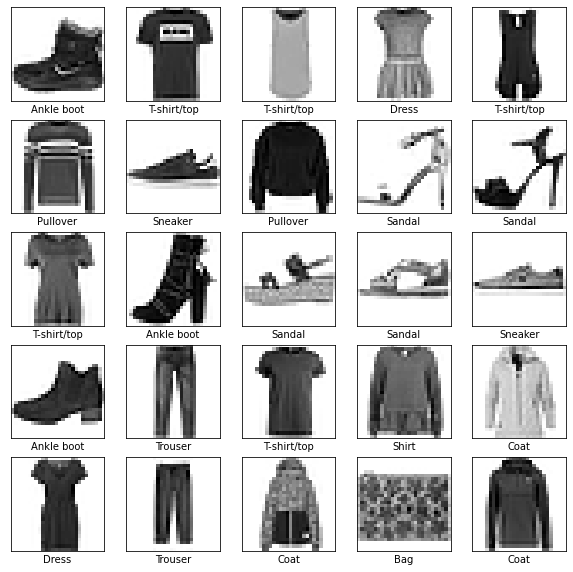

In [292]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## Построение модели

Построение нейронной сети подразумевает конфигурацию ее слоев и последующую компиляцию.

### Определение слоев

Давайте создадим 3 слоя нейронной сети с помощью функционала Keras.layers

In [293]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

Соберем модель в функциональной форме (функциональное API Keras) 

Сеть собираем как последовательности соединей узлов:
 
 вход -> слой 1 -> слой 2 -> выход

 связь идет через тензоры

In [294]:
from tensorflow.keras.layers import Input, Flatten
from tensorflow.keras.models import Model
import tensorflow

In [295]:
model.summary()

Model: "sequential_35"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_20 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_117 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_118 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [296]:
inputs = Input(shape=(28, 28))
x_1 = keras.layers.Flatten()(inputs)
x = keras.layers.Dense(128, activation='relu')(x_1)
outputs = keras.layers.Dense(10)(x)

model = keras.Model(   inputs,outputs)

In [297]:
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten_21 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_119 (Dense)            (None, 128)               100480    
_________________________________________________________________
dense_120 (Dense)            (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


Первый слой, `tf.keras.layers.Flatten`, трасформирует двумерный массив на входе в одномерный массив.

Получившиеся 784(28 x 28) входных нейрона присоединяем к полносвязному слою из 128 нейронов , которые будут использовать функцию активации relu. В выходном слое будет 10 нейронов, по числу классов, которые он должен предсказывать. В нем будет использоваться функция активации softmax и он будет давать предсказание от 0 до 1, где 1 это стопроцентная вероятность.

### Компиляция модели

Давайте вспомним ключевые понятия, которые нам понадобяться при компиляции:

* *Loss function* — меряет как точно работает нейросеть.
* *Optimizer* — определяет способ корректировки весов.
* *Metrics* — определяет за какие характеристики будут отражаться в процессе обучения.

In [298]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## Тренировка модели

Здесь все стандартно - данные передаются в нейросеть и сопоставляются изображения и лейблы.



### Передача данных в модель

Команда непосредственно запускающая процесс обучения называется - `model.fit`:

In [299]:
model.fit(train_images, y_train_labels, epochs=3, batch_size=100)

Epoch 1/3
600/600 [==============================] - 2s 3ms/step - loss: 0.5423 - accuracy: 0.8136
Epoch 2/3
600/600 [==============================] - 2s 3ms/step - loss: 0.4045 - accuracy: 0.8570
Epoch 3/3
600/600 [==============================] - 2s 3ms/step - loss: 0.3602 - accuracy: 0.8715


In [300]:
test_loss, test_acc = model.evaluate(test_images,  y_test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3864 - accuracy: 0.8650

Test accuracy: 0.8650000095367432


В выводе выше мы следим за точностью в процессе обучения, проверяем точность на тестовых данных и меняем параметры нейросети если точность на тестовых данных нас не устраивает.

In [301]:
y_p = model.predict(test_images[:1,:,:])

In [302]:
y_p

array([[-3.479393  , -9.921186  , -4.0639105 , -5.768213  , -5.01016   ,
         4.638773  , -3.9426432 ,  4.8655815 , -0.84352916,  6.3580127 ]],
      dtype=float32)

### Предсказания нейросети

Команды ниже позволяют проверить работу натренированной ранее нейросети - 

In [303]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [304]:
predictions = probability_model.predict(test_images)

In [305]:
predictions[0]

array([3.8020768e-05, 6.0587908e-08, 2.1191796e-05, 3.8547696e-06,
       8.2265433e-06, 1.2755445e-01, 2.3924007e-05, 1.6002862e-01,
       5.3059333e-04, 7.1179104e-01], dtype=float32)

In [306]:
np.argmax(predictions[0])

9

In [307]:
test_labels[0]

9

In [308]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

### Проверка предсказаний

Matplotlib нам дает возможность посмотреть наше предсказание графически:

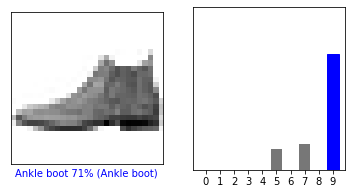

In [309]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

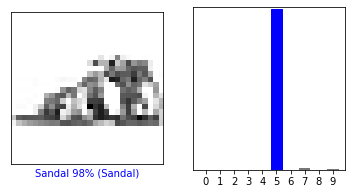

In [310]:
i = 11
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

Давайте сделаем еще несколько предсказаний - 

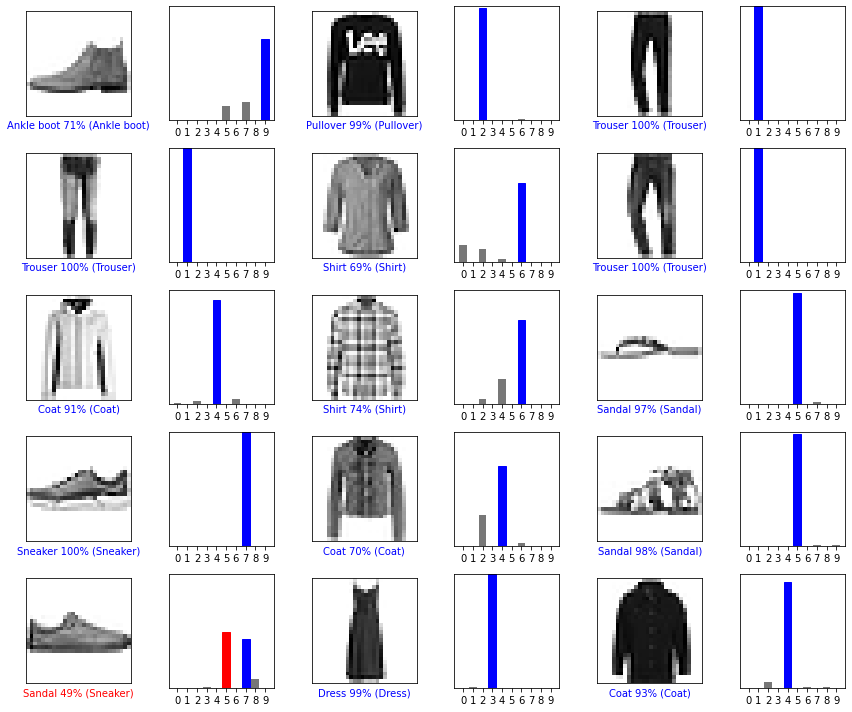

In [311]:

num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## Использование полученной модели

Давайте возьмем одно изображение из тестовой выборке и посмотрим предсказание нейронной сети - 

In [312]:

img1 = test_images[1]

print(img1.shape)

(28, 28)


In [313]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img1,0))

print(img.shape)

(1, 28, 28)


In [314]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[7.9102843e-05 2.7034789e-08 9.8571068e-01 2.3703595e-07 4.0299091e-03
  1.4946020e-11 1.0179251e-02 1.1644879e-11 8.7687044e-07 3.0920175e-13]]


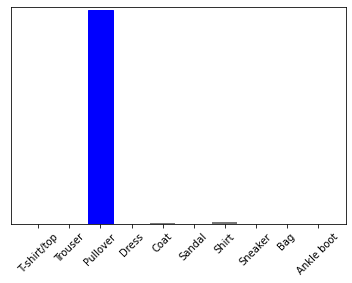

In [315]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

`keras.Model.predict` возвращает список списков — по одному списку для каждого предсказания в батче. Нам нужны предсказания только для одного изображения:

In [316]:
np.argmax(predictions_single[0])

2

## **Проведем анализ работы модели по слоям**

Состояние узлов в сети по эпохам (пакетам) и слоям можно оценить используя средства tensorflow через объект GradientTape() - исполняет шаг вычисления градиента для модели по ее loss для всех тренируемых весов модели (<имя модели>.trainable_weights) (см. https://www.tensorflow.org/guide/basic_training_loops, https://www.tensorflow.org/api_docs/python/tf/GradientTape)


данные для обучения получим из tensorflow.data.Dataset (https://www.tensorflow.org/guide/data), куда передаем выборку , а на выходе получаем генератор пакетов заданного размера

In [317]:
# собираем сеть
level =5
inputs = Input(shape=(28,28,1), name='digits') 
x=Flatten()(inputs)
for i in range(level):
  #x = Dense(64, activation='relu', name='dense_'+str(i))(x) 
  x = Dense(64, activation='sigmoid', name='dense_'+str(i))(x) 
outputs = Dense(10, activation='sigmoid' ,name='predictions')(x) 
modelg = Model(inputs=inputs, outputs=outputs) 




# Создадим экземпляр оптимизатора. 
optimizer = tensorflow.keras.optimizers.SGD(learning_rate=1e-3) 
# Instantiate a loss function. 
loss_fn = tensorflow.keras.losses.MeanSquaredError() #(from_logits=True) 
# Подготовим тренировочный датасет. 
batch_size = 64 
train_dataset = tensorflow.data.Dataset.from_tensor_slices((train_images, y_train_labels)) 
train_dataset = train_dataset.shuffle(buffer_size=1024).batch(batch_size) 
# Итерируем по эпохам.
grad_log=[]

epochs=2  # учим немного, т.к. задача посмотреть , что происходит с градиентом
for epoch in range(epochs): 
  print('Начинаем эпоху %d' % (epoch,)) 
  # Итерируем по пакетам в датасете. 
  for step, (x_batch_train, y_batch_train) in enumerate(train_dataset): 
    # Откроем GradientTape чтобы записать операции # выполняемые во время прямого прохода, 
    #включающего автодифференцирование. 
    with tensorflow.GradientTape() as tape: 
      # Запустим прямой проход слоя. 
      # Операции применяемые слоем к своим 
      # входным данным будут записаны 
      # на GradientTape. 
      loggits = modelg(x_batch_train) 
      # loggits для пакета  - выходы модели 
      # Вычислим значение потерь для этого пакета. 
      y_s=y_batch_train.numpy().shape
      y  = tensorflow.reshape( y_batch_train,shape=(y_s[0],10,1))
      l = tensorflow.reshape( loggits,shape=(y_s[0],10,1))
      # вызываем лосс
      loss_value = loss_fn(y, l) 
      # Используем gradient tape для автоматического извлечения градиентов 
      # обучаемых переменных относительно потерь. 
      grads = tape.gradient(loss_value, modelg.trainable_weights) 
      g_g=[]
      w_w =[]
      # пишем логи для сохранения значений градиента и веса по одной цепи 
      # (0-й канал распространения активности)
      for g_s in grads:
        # допишем логи значений градиента в зависимости от размера тензора градиента
        if len(g_s.numpy().shape)==1:
         
          g_g.append(g_s.numpy()[0])
        if len(g_s.numpy().shape)==2:
          
          g_g.append(g_s.numpy()[0,0]) 
        if len(g_s.numpy().shape)==3:
          
          g_g.append(g_s.numpy()[0,0,0]) 
        if len(g_s.numpy().shape)==4:
          
          g_g.append(g_s.numpy()[0,0,0,0])  

              
      # добавляем текущие логи по слоям к общей записи
      grad_log.append(g_g)

      # Выполним один шаг градиентного спуска обновив # значение переменных минимизирующих потери. 
      optimizer.apply_gradients(zip(grads, modelg.trainable_weights)) 
      # Пишем лог каждые 200 пакетов. 
      if step % 200 == 0: 
        print('Потери на обучении (для одного пакета) на шаге %s: %s' % (step, float(loss_value))) 
        print('Уже увидели: %s примеров' % ((step + 1) * batch_size))
grad_log=np.array(grad_log)



Начинаем эпоху 0
Потери на обучении (для одного пакета) на шаге 0: 0.32459375262260437
Уже увидели: 64 примеров
Потери на обучении (для одного пакета) на шаге 200: 0.304207980632782
Уже увидели: 12864 примеров
Потери на обучении (для одного пакета) на шаге 400: 0.2882964015007019
Уже увидели: 25664 примеров
Потери на обучении (для одного пакета) на шаге 600: 0.27275776863098145
Уже увидели: 38464 примеров
Потери на обучении (для одного пакета) на шаге 800: 0.25758594274520874
Уже увидели: 51264 примеров
Начинаем эпоху 1
Потери на обучении (для одного пакета) на шаге 0: 0.2483433187007904
Уже увидели: 64 примеров
Потери на обучении (для одного пакета) на шаге 200: 0.23722565174102783
Уже увидели: 12864 примеров
Потери на обучении (для одного пакета) на шаге 400: 0.22493068873882294
Уже увидели: 25664 примеров
Потери на обучении (для одного пакета) на шаге 600: 0.21550075709819794
Уже увидели: 38464 примеров
Потери на обучении (для одного пакета) на шаге 800: 0.2024577558040619
Уже увиде

In [318]:
modelg.summary()

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
digits (InputLayer)          [(None, 28, 28, 1)]       0         
_________________________________________________________________
flatten_22 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_0 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_3 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                416

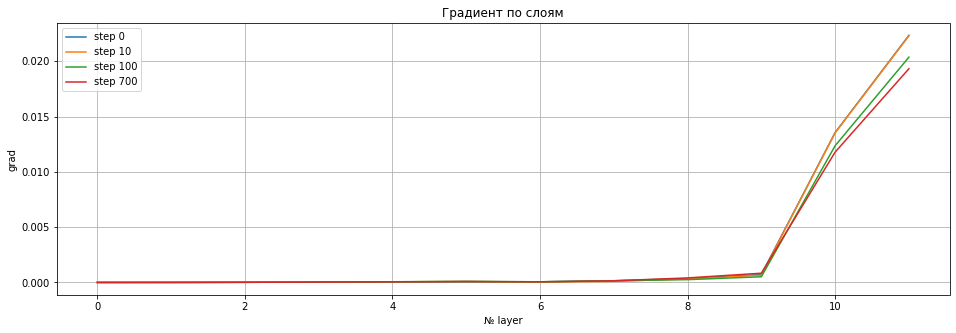

In [319]:
plt.figure(figsize=(16,5))
plt.title('Градиент по слоям')
plt.xlabel('№ layer')
plt.ylabel('grad')
plt.grid()
plt.plot(np.abs(grad_log[0,:]),label='step 0')
plt.plot(np.abs(grad_log[10,:]),label='step 10')
plt.plot(np.abs(grad_log[100,:]),label='step 100')
plt.plot(np.abs(grad_log[700,:]),label='step 700')
plt.legend()
plt.show()

### Сделаем анализ ошибок модели

In [320]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [321]:
y_pred = np.argmax(probability_model.predict(test_images), axis=1)
y_pred[:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7])

In [322]:
CM = confusion_matrix(test_labels,y_pred)
print(CM)

[[825   4  19  49   5   2  83   0  13   0]
 [  3 957   5  25   6   0   3   0   1   0]
 [ 20   2 793  10 135   1  37   0   2   0]
 [ 21  10  20 886  39   0  21   0   3   0]
 [  0   1 101  28 844   0  23   0   3   0]
 [  0   0   0   1   0 946   0  40   1  12]
 [145   1 124  41 127   0 551   0  11   0]
 [  0   0   0   0   0  19   0 969   0  12]
 [  5   1   9   5   6   3   7   6 958   0]
 [  0   0   0   0   0  10   1  68   0 921]]


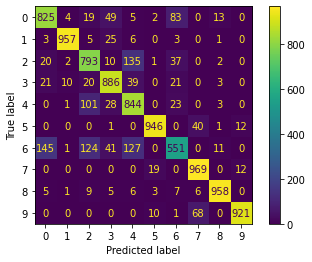

In [323]:
disp = ConfusionMatrixDisplay(confusion_matrix=CM, display_labels=np.arange(10))

disp.plot( values_format ='.3g')
plt.show()

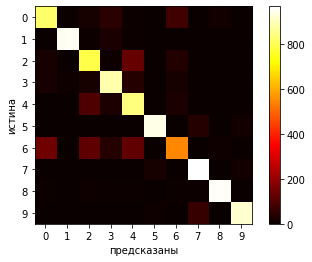

In [324]:
plt.imshow(CM, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.yticks(ticks=np.arange(10))
plt.xticks(ticks=np.arange(10))
plt.xlabel('предсказаны')
plt.ylabel('истина')
plt.show()

Сеть делает ошибки. Можно их попробовать исправить, если сделать комбинацию сетей (ансамбль) . Проверим вариант усреднения.

Нейросеть при хорошо подобранных параметрах должна была выдать корректное предсказание


Реализуем одинаковые сети в разном стиле:
- model1 - линейная модель через список
- model2 - линейная модель через добавление слоев по очереди
- model3 - модель через функциональное описание

У всех 3-х сетей предпоследний слой линейный (это не правильно для классификации и сделано, что бы модель была совсем простой)




In [325]:
# заполняем модель списком
model1 = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='sigmoid'),
    keras.layers.Dense(10, activation='softmax')
])

# заполняем модель , добавляя слои последовательно 
model2 = keras.Sequential()
model2.add(keras.layers.Flatten(input_shape=(28, 28)))
model2.add(keras.layers.Dense(256, activation='linear'))
model2.add(keras.layers.Dense(10, activation='softmax'))


# Заполняем модель, формируя граф передачи тензоров
x_input = keras.layers.Input(shape=(28,28))
x3 = keras.layers.Flatten()(x_input)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x_output = keras.layers.Dense(10, activation='softmax')(x3)
model3=keras.models.Model(x_input,x_output)

model1.compile(optimizer='sgd',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model2.compile(optimizer='rmsprop',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
model3.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

hist1=model1.fit(train_images, train_labels, epochs=5)
hist2=model2.fit(train_images, train_labels, epochs=5)
hist3=model3.fit(train_images, train_labels, epochs=5)



Epoch 1/5


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


1875/1875 [==============================] - 4s 2ms/step - loss: 1.2718 - accuracy: 0.6711
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.7717 - accuracy: 0.7563
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6597 - accuracy: 0.7786
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6024 - accuracy: 0.7943
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5652 - accuracy: 0.8057
Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.5993 - accuracy: 0.7970
Epoch 2/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4781 - accuracy: 0.8334
Epoch 3/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4586 - accuracy: 0.8426
Epoch 4/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4440 - accuracy: 0.8454
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4366 - accuracy: 0.8480


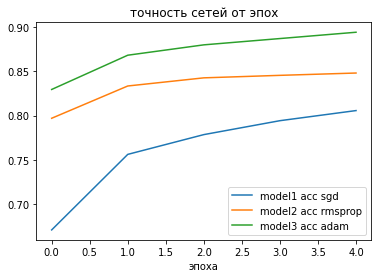

In [326]:
plt.plot(hist1.history['accuracy'],label='model1 acc sgd')
plt.plot(hist2.history['accuracy'],label='model2 acc rmsprop')
plt.plot(hist3.history['accuracy'],label ='model3 acc adam')
plt.title('точность сетей от эпох')
plt.xlabel('эпоха')
plt.legend()
plt.show()

In [327]:
y_pred1 = np.argmax(model1.predict(test_images),axis=1)
y_pred2 = np.argmax(model2.predict(test_images),axis=1)
y_pred3 = np.argmax(model3.predict(test_images),axis=1)

CM1 = confusion_matrix(test_labels,y_pred1)
CM2 = confusion_matrix(test_labels,y_pred2)
CM3 = confusion_matrix(test_labels,y_pred3)

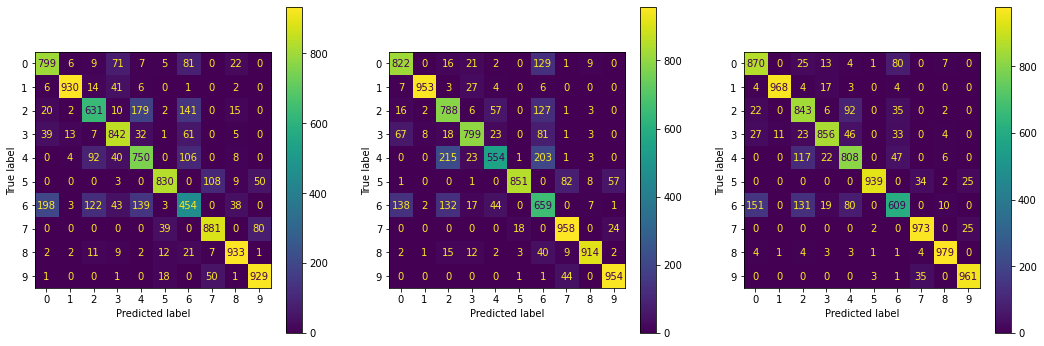

In [328]:

fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))
disp1 = ConfusionMatrixDisplay(confusion_matrix=CM1, display_labels=np.arange(10))
disp1.plot( ax=ax1, values_format ='.3g')
disp2 = ConfusionMatrixDisplay(confusion_matrix=CM2, display_labels=np.arange(10))
disp2.plot( ax=ax2, values_format ='.3g')
disp3 = ConfusionMatrixDisplay(confusion_matrix=CM3, display_labels=np.arange(10))
disp3.plot( ax=ax3, values_format ='.3g')
plt.show()

In [329]:
# сохранить модели на диск.
model1.save_weights('model1.h5')
model2.save_weights('model2.h5')
model3.save_weights('model3.h5')
# прочитать модели с диска (перед этим, нужно положить их в каталог для работы виртуальной машины Колаборатории):
# model.load_weights('model.h5')

Выгрузим на локальную машину нашу модель

In [330]:
from google.colab import files

files.download('model1.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [331]:
x3

<KerasTensor: shape=(None, 256) dtype=float32 (created by layer 'dense_125')>

Сделаем предсказание на тестовом изображении

In [332]:
y_pred = model3.predict(test_images)
y_pred_arg = np.argmax(y_pred, axis=1)


Отобразим значения на выходах сети (10 выходов - 10 точек графика)

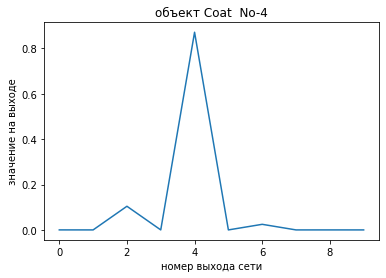

In [333]:
N = 10 
plt.plot(y_pred[N,:])
plt.title('объект ' +class_names[test_labels[N]]+ '  No-'+str(test_labels[N]))
plt.xlabel('номер выхода сети')
plt.ylabel('значение на выходе')
plt.show()

In [334]:
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/backend.py:4930: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  '"`sparse_categorical_crossentropy` received `from_logits=True`, but '


313/313 - 1s - loss: 0.3441 - accuracy: 0.8806


### **Ансамбль сетей**

Использование функционального API для построения сложных сетей

In [335]:
input1 = keras.layers.Input(shape=(28, 28))
x1= keras.layers.Flatten()(input1)
x1 = keras.layers.Dense(128, activation='relu')(x1)
x1 =keras.layers.Dense(10, activation='softmax')(x1)

model11 =keras.models.Model(inputs=input1,outputs=x1)


x2= keras.layers.Flatten()(input1)
x2 = keras.layers.Dense(256, activation='relu')(x2)
x2=keras.layers.Dense(10, activation='softmax')(x2)

model22 =keras.models.Model(inputs=input1,outputs=x2)

x3= keras.layers.Flatten()(input1)
x3 = keras.layers.Dense(256, activation='relu')(x3)
x3=keras.layers.Dense(10, activation='softmax')(x3)


model33 =keras.models.Model(inputs=input1,outputs=x3)

# усредняем выходы сетей
out_all = keras.layers.Average()([model11.output,model22.output,model33.output])
out_all = keras.layers.Softmax()(out_all)

model_all=keras.models.Model(inputs =[input1],outputs =out_all)
model_all.compile(optimizer=tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


model11.load_weights('model1.h5')
model22.load_weights('model2.h5')
model33.load_weights('model3.h5')

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [336]:
tf.keras.optimizers.Adam()

In [337]:
model_all.summary()

Model: "model_22"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_11 (InputLayer)           [(None, 28, 28)]     0                                            
__________________________________________________________________________________________________
flatten_26 (Flatten)            (None, 784)          0           input_11[0][0]                   
__________________________________________________________________________________________________
flatten_27 (Flatten)            (None, 784)          0           input_11[0][0]                   
__________________________________________________________________________________________________
flatten_28 (Flatten)            (None, 784)          0           input_11[0][0]                   
___________________________________________________________________________________________

In [338]:
from tensorflow.keras.utils import plot_model

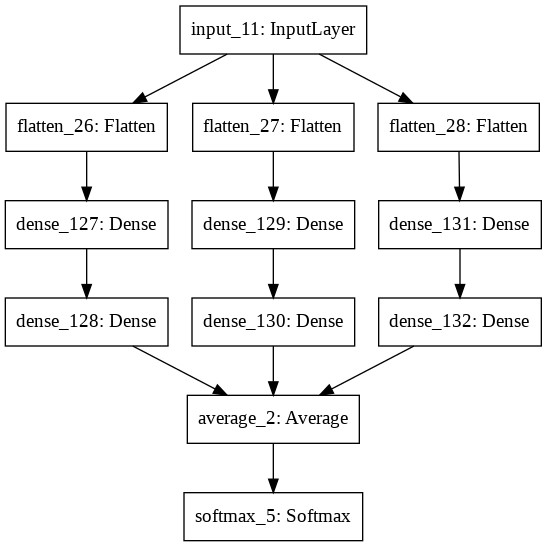

In [339]:
plot_model(model_all,to_file='new_model-all.png')

In [340]:
predictions_single=model_all.predict(img)

print(predictions_single)

[[0.08592471 0.08589196 0.22292557 0.08589231 0.08630827 0.08589194
  0.08948924 0.08589194 0.08589215 0.08589194]]


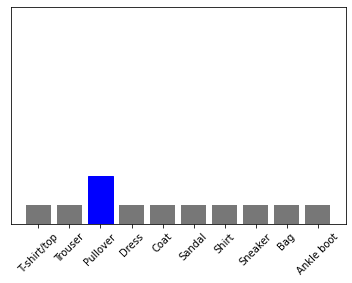

In [341]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [342]:
test_loss, test_acc = model_all.evaluate(test_images,  test_labels, verbose=2)

313/313 - 1s - loss: 2.2199 - accuracy: 0.8582


In [343]:
model11.save('model_11.h5')

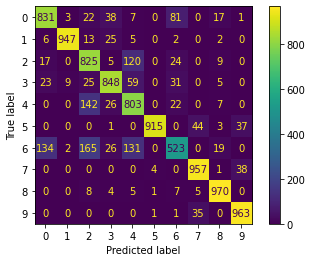

In [344]:
y_pred_all = np.argmax(model_all.predict(test_images),axis=1)

CM_all = confusion_matrix(test_labels,y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(  values_format ='.3g')
plt.show()

In [345]:
hist1=model_all.fit(train_images, train_labels, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1997 - accuracy: 0.8735
Epoch 2/5
1875/1875 [==============================] - 7s 3ms/step - loss: 2.1961 - accuracy: 0.8764
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1950 - accuracy: 0.8775
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1944 - accuracy: 0.8775
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 2.1939 - accuracy: 0.8792


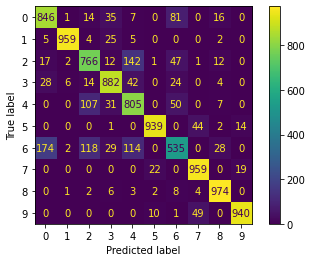

In [346]:
y_pred_all = np.argmax(model_all.predict(test_images),axis=1)

CM_all = confusion_matrix(test_labels,y_pred_all)
disp_all = ConfusionMatrixDisplay(confusion_matrix=CM_all, display_labels=np.arange(10))
disp_all.plot(  values_format ='.3g')
plt.show()

In [347]:
from tensorflow.keras.layers import Concatenate 

In [348]:
input6 = keras.layers.Input( shape=(28, 28) )
x6= keras.layers.Flatten()(input6)
x6 = keras.layers.Dense(256, activation='relu')(x6)
x6=keras.layers.Dense(1, activation='sigmoid')(x6)


model6 =Model(inputs=input6,outputs=x6)
model6.compile(optimizer=tf.keras.optimizers.Adagrad(lr=0.1, epsilon=1e-08, decay=0.0),
              loss=tf.keras.losses.BinaryCrossentropy(),
              metrics=['accuracy'])

model6.fit(train_images,y_train_labels[:,6], epochs = 10, validation_split = 0.2)


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1971 - accuracy: 0.9177 - val_loss: 0.1536 - val_accuracy: 0.9348
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1587 - accuracy: 0.9329 - val_loss: 0.1439 - val_accuracy: 0.9405
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1481 - accuracy: 0.9376 - val_loss: 0.1425 - val_accuracy: 0.9399
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1401 - accuracy: 0.9408 - val_loss: 0.1350 - val_accuracy: 0.9423
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1348 - accuracy: 0.9420 - val_loss: 0.1310 - val_accuracy: 0.9464
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1295 - accuracy: 0.9453 - val_loss: 0.1317 - val_accuracy: 0.9470
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1262 - accuracy: 0.9471 - val_loss: 0.1453 - val_accuracy:

## Практическое задание

  1. Постройте нейронную сеть(берем простую линейную сеть, которую разбирали на уроке: меняем число слоев, число нейронов , типы активации, тип оптимизатора)  на датасет from sklearn.datasets import load_boston. 
  2. Измените функцию потерь и метрику для этой задачи. Постройте 10-15 вариантов и сведите результаты их работы в таблицу  Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?

  3. Поработайте с документацией TensorFlow 2. Найти 2-3 полезные команды TensorFlow, не разобранные на уроке (полезные для Вас).

  1-2. (*)  Попробуйте обучить нейронную сеть на TensorFlow 2 на датасете imdb_reviews .Опишите, какого результата вы добились от нейросети? Что помогло вам улучшить ее точность?
    
    
</ol>



## Набор данных для последнего ДЗ

- COVID 19 диагностика https://www.kaggle.com/andrewmvd/covid19-ct-scans

- Распознавание изображений цифр в представлении языка жестов https://www.kaggle.com/ardamavi/sign-language-digits-dataset

## Дополнительные материалы

<ol>
    <li>www.tensorflow.org/api_docs</li>
</ol>

## Используемая литература 

Для подготовки данного методического пособия были использованы следующие ресурсы:
<ol>
    <li>https://www.tensorflow.org/</li>
    <li>https://www.tensorflow.org/tutorials/keras/classification</li>
    <li>Singh P., Manure A. - Learn TensorFlow 2.0 - 2020</li>
    <li>Шакла Н. — Машинное обучение и TensorFlow 2019</li>
    <li>Википедия</li>
    
</ol>